# VADER Sentiment Scoring

In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Sentiment Analysis on the results of the Naive Bayes Model

In [4]:
data = pd.read_csv("C:/Users/user/Documents/Bayes/ARP/ARP Topic/Codes/Codes/ICE_naive_bayes_predictions.csv", encoding='ISO-8859-1')

In [6]:
# data.info()

In [7]:
sid = SentimentIntensityAnalyzer()
data[['neg', 'neu', 'pos', 'compound']] = data['Comment'].apply(lambda x: pd.Series(sid.polarity_scores(x)))

In [8]:
def get_sentiment_category(score):
    if score > 0:
        return 1
    elif score < 0:
        return 0
    else:
        return 0

In [10]:
data['sentiment'] = data['Comment'].apply(lambda x: get_sentiment_category(sid.polarity_scores(x)['compound']))
data_filtered = data[(data['sentiment'] == 1) | (data['sentiment'] == 0)]
data_filtered.to_csv("FormulaE_Sentiment_Analysis_final.csv", index=False)

# Visualisations

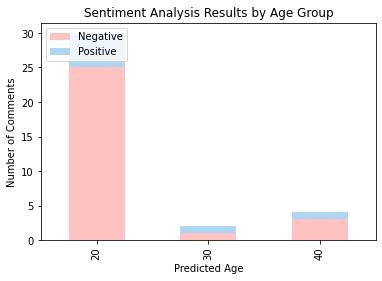

In [11]:
grouped = data_filtered.groupby(['predicted_age', 'sentiment']).size().unstack()

colors = ['#FFC2C2', '#AED6F1']

# Plot the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, color=colors)

# Add chart labels and title
plt.xlabel('Predicted Age')
plt.ylabel('Number of Comments')
plt.title('Sentiment Analysis Results by Age Group')

handles, labels = ax.get_legend_handles_labels()
labels = ['Negative', 'Positive']
plt.legend(handles, labels, loc='upper left')
plt.show()